# Obtendo dados do Tesouro Direto

## 1 - Importando as ferramentas

In [276]:
import pandas as pd
pd.set_option("display.max_colwidth", 150)
pd.set_option("display.min_rows", 20)

import matplotlib
matplotlib.style.use('seaborn-darkgrid')
matplotlib.rcParams['figure.figsize'] = (18,8)

import plotly.graph_objects as go
import plotly.express as px

import yfinance as yf

## 2 - Funções para coletar os dados

In [225]:
def busca_titulos_tesouro_direto():
  url = 'https://www.tesourotransparente.gov.br/ckan/dataset/df56aa42-484a-4a59-8184-7676580c81e3/resource/796d2059-14e9-44e3-80c9-2d9e30b405c1/download/PrecoTaxaTesouroDireto.csv'
  df  = pd.read_csv(url, sep=';', decimal=',')
  df['Data Vencimento'] = pd.to_datetime(df['Data Vencimento'], dayfirst=True)
  df['Data Base']       = pd.to_datetime(df['Data Base'], dayfirst=True)
  multi_indice = pd.MultiIndex.from_frame(df.iloc[:, :3])
  df = df.set_index(multi_indice).iloc[: , 3:]  
  df.sort_index(inplace=True)
  return df

In [226]:
def busca_vendas_tesouro():
  url = "https://www.tesourotransparente.gov.br/ckan/dataset/f0468ecc-ae97-4287-89c2-6d8139fb4343/resource/e5f90e3a-8f8d-4895-9c56-4bb2f7877920/download/VendasTesouroDireto.csv"
  df  = pd.read_csv(url, sep=';', decimal=',')
  df['Vencimento do Titulo'] = pd.to_datetime(df['Vencimento do Titulo'], dayfirst=True)
  df['Data Venda']       = pd.to_datetime(df['Data Venda'], dayfirst=True)
  multi_indice = pd.MultiIndex.from_frame(df.iloc[:, :3])
  df = df.set_index(multi_indice).iloc[: , 3:]  
  df.sort_index(inplace=True)
  return df

In [227]:
def busca_recompras_tesouro():
  url = "https://www.tesourotransparente.gov.br/ckan/dataset/f30db6e4-6123-416c-b094-be8dfc823601/resource/30c2b3f5-6edd-499a-8514-062bfda0f61a/download/RecomprasTesouroDireto.csv"
  df  = pd.read_csv(url, sep=';', decimal=',')
  df['Vencimento do Titulo'] = pd.to_datetime(df['Vencimento do Titulo'], dayfirst=True)
  df['Data Resgate']       = pd.to_datetime(df['Data Resgate'], dayfirst=True)
  multi_indice = pd.MultiIndex.from_frame(df.iloc[:, :3])
  df = df.set_index(multi_indice).iloc[: , 3:]  
  df.sort_index(inplace=True)
  return df

## 3 - Coletando os dados

In [228]:
titulos = busca_titulos_tesouro_direto()

In [231]:
tipos_titulos = titulos.index.droplevel(level=1).droplevel(level=1).drop_duplicates().to_list()
tipos_titulos

['Tesouro Educa+',
 'Tesouro IGPM+ com Juros Semestrais',
 'Tesouro IPCA+',
 'Tesouro IPCA+ com Juros Semestrais',
 'Tesouro Prefixado',
 'Tesouro Prefixado com Juros Semestrais',
 'Tesouro Renda+ Aposentadoria Extra',
 'Tesouro Selic']

In [232]:
selic2025 = titulos.loc[('Tesouro Selic', '2025-03-01')]
selic2025

,Taxa Compra Manha,Taxa Venda Manha,PU Compra Manha,PU Venda Manha,PU Base Manha
Data Base,,,,,
2019-02-01,0.02,0.06,9926.99,9902.94,9900.45
2019-02-04,0.02,0.06,9929.43,9905.40,9902.91
2019-02-05,0.02,0.06,9931.88,9907.87,9905.36
2019-02-06,0.02,0.06,9934.34,9910.33,9907.83
2019-02-07,0.02,0.06,9936.79,9912.80,9910.29
...,...,...,...,...,...
2025-01-13,0.01,0.02,15886.06,15878.55,15878.55
2025-01-14,0.01,0.02,15893.30,15885.79,15885.79
2025-01-15,0.00,0.01,15900.60,15893.10,15893.10


<Axes: xlabel='Data Base'>

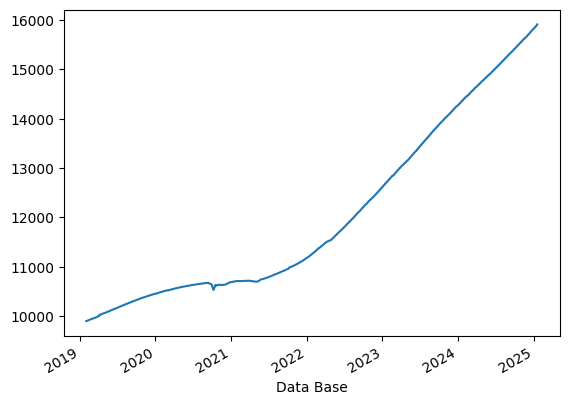

In [233]:
selic2025['PU Base Manha'].plot()

In [234]:
pre2023 = titulos.loc[('Tesouro Prefixado', '2023-01-01')]
pre2023

,Taxa Compra Manha,Taxa Venda Manha,PU Compra Manha,PU Venda Manha,PU Base Manha
Data Base,,,,,
2016-01-26,16.59,16.65,346.72,345.49,345.28
2016-01-27,16.32,16.38,352.52,351.27,351.06
2016-01-28,16.42,16.48,350.65,349.41,349.20
2016-01-29,15.93,15.99,361.21,359.92,359.71
2016-02-01,15.89,15.95,362.28,360.99,360.78
...,...,...,...,...,...
2022-12-23,13.83,13.95,997.43,996.89,996.89
2022-12-26,13.87,13.99,997.94,997.40,997.40
2022-12-27,13.91,14.03,998.45,997.91,997.91


<Axes: xlabel='Data Base'>

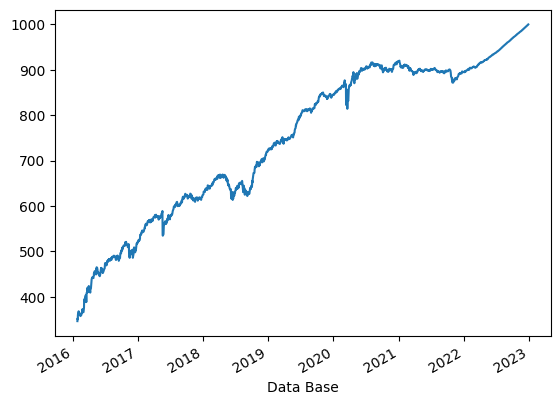

In [235]:
pre2023['PU Compra Manha'].plot()

<Axes: xlabel='Data Base'>

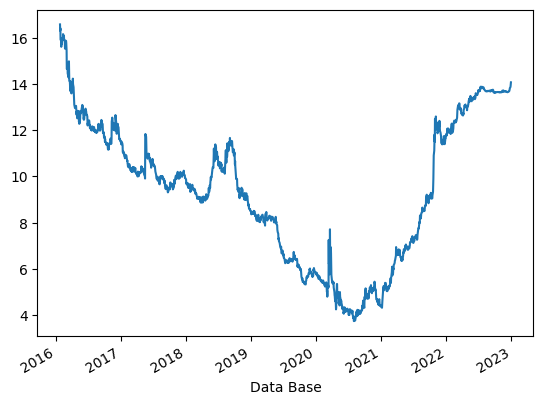

In [236]:
pre2023['Taxa Compra Manha'].plot()

<Axes: xlabel='Data Base'>

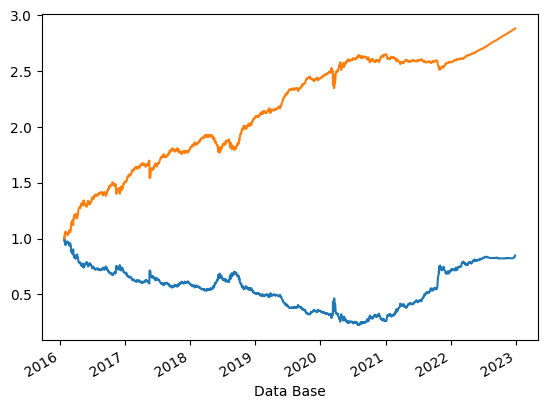

In [237]:
(pre2023['Taxa Compra Manha'] / pre2023['Taxa Compra Manha'].iloc[0]).plot()
(pre2023['PU Compra Manha'] / pre2023['PU Compra Manha'].iloc[0]).plot()

In [238]:
pre2026 = titulos.loc[('Tesouro Prefixado', '2026-01-01')]
pre2026

,Taxa Compra Manha,Taxa Venda Manha,PU Compra Manha,PU Venda Manha,PU Base Manha
Data Base,,,,,
2020-02-10,6.36,6.48,696.02,691.42,691.25
2020-02-11,6.26,6.38,700.05,695.42,695.25
2020-02-12,6.22,6.34,701.76,697.13,696.96
2020-02-13,6.28,6.40,699.61,695.00,694.82
2020-02-14,6.23,6.35,701.71,697.08,696.91
...,...,...,...,...,...
2025-01-13,14.97,15.09,873.65,872.28,872.28
2025-01-14,14.86,14.98,874.94,873.57,873.57
2025-01-15,14.79,14.91,875.93,874.57,874.57


<Axes: xlabel='Data Base'>

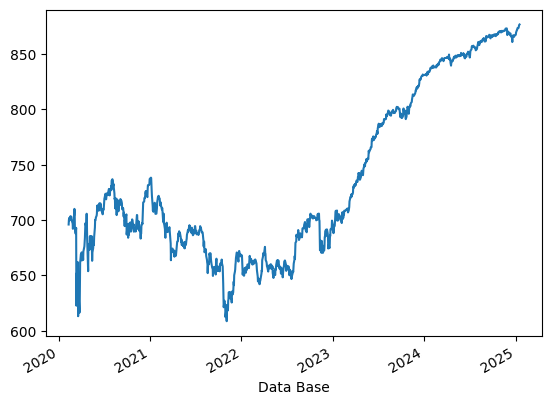

In [239]:
pre2026['PU Compra Manha'].plot()

<Axes: xlabel='Data Base'>

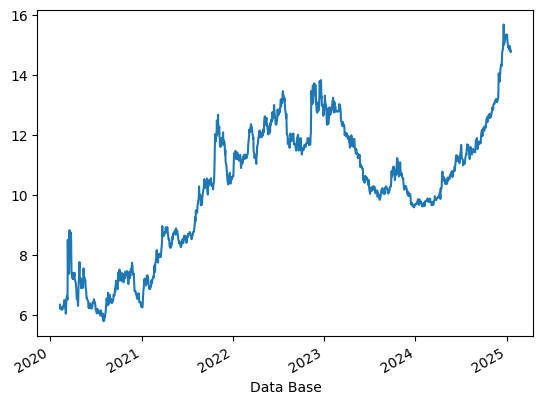

In [240]:
pre2026['Taxa Compra Manha'].plot()

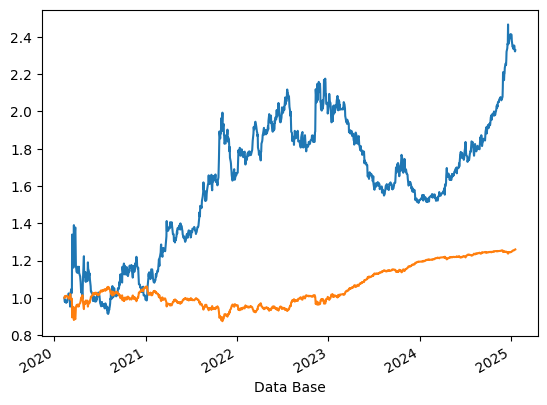

In [241]:
(pre2026['Taxa Compra Manha'] / pre2026['Taxa Compra Manha'].iloc[0]).plot();
(pre2026['PU Compra Manha'] / pre2026['PU Compra Manha'].iloc[0]).plot();

In [242]:
pre2031 = titulos.loc[('Tesouro Prefixado com Juros Semestrais', '2031-01-01')]
pre2031

,Taxa Compra Manha,Taxa Venda Manha,PU Compra Manha,PU Venda Manha,PU Base Manha
Data Base,,,,,
2020-02-10,6.69,6.81,1257.57,1247.33,1247.00
2020-02-11,6.57,6.69,1268.26,1257.90,1257.57
2020-02-12,6.56,6.68,1269.45,1259.08,1258.76
2020-02-13,6.64,6.76,1262.85,1252.56,1252.23
2020-02-14,6.56,6.68,1270.09,1259.73,1259.40
...,...,...,...,...,...
2025-01-13,15.37,15.49,811.00,806.81,806.81
2025-01-14,15.34,15.46,812.40,808.20,808.20
2025-01-15,15.07,15.19,821.36,817.11,817.11


<Axes: xlabel='Data Base'>

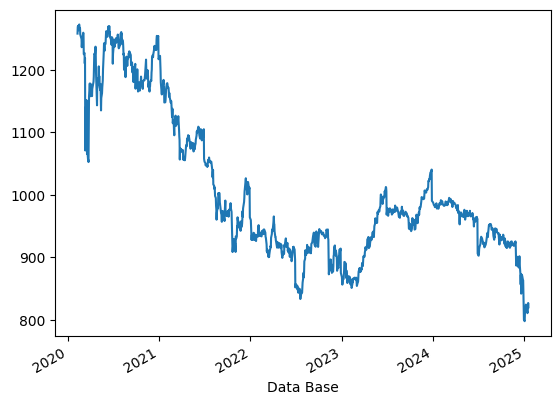

In [244]:
pre2031['PU Compra Manha'].plot()

<Axes: xlabel='Data Base'>

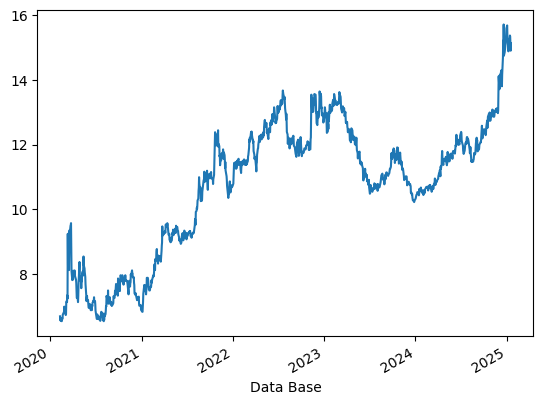

In [245]:
pre2031['Taxa Compra Manha'].plot()

<Axes: xlabel='Data Base'>

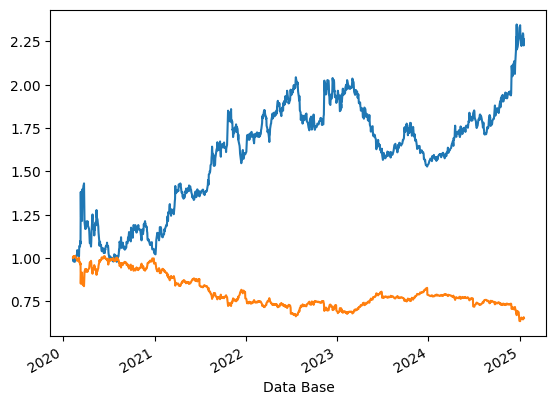

In [246]:
(pre2031['Taxa Compra Manha'] / pre2031['Taxa Compra Manha'].iloc[0]).plot()
(pre2031['PU Compra Manha'] / pre2031['PU Compra Manha'].iloc[0]).plot()

In [247]:
ipca2026 = titulos.loc[('Tesouro IPCA+', '2026-08-15')]
ipca2026

,Taxa Compra Manha,Taxa Venda Manha,PU Compra Manha,PU Venda Manha,PU Base Manha
Data Base,,,,,
2020-02-10,2.65,2.77,2785.55,2764.50,2764.01
2020-02-11,2.58,2.70,2798.39,2777.24,2776.76
2020-02-12,2.56,2.68,2802.40,2781.23,2780.75
2020-02-13,2.58,2.70,2799.33,2778.20,2777.72
2020-02-14,2.54,2.66,2807.15,2785.97,2785.22
...,...,...,...,...,...
2025-01-13,7.77,7.89,3905.62,3896.92,3896.92
2025-01-14,7.77,7.89,3907.43,3898.75,3898.75
2025-01-15,7.76,7.88,3909.22,3901.15,3901.15


<Axes: xlabel='Data Base'>

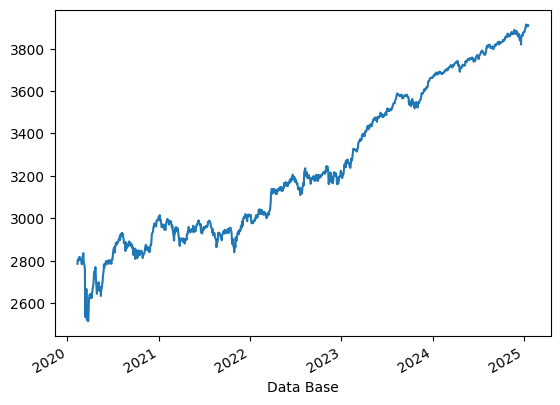

In [248]:
ipca2026['PU Compra Manha'].plot()

<Axes: xlabel='Data Base'>

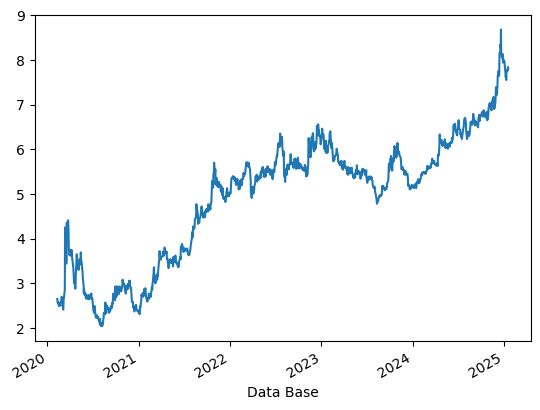

In [249]:
ipca2026['Taxa Compra Manha'].plot()

<Axes: xlabel='Data Base'>

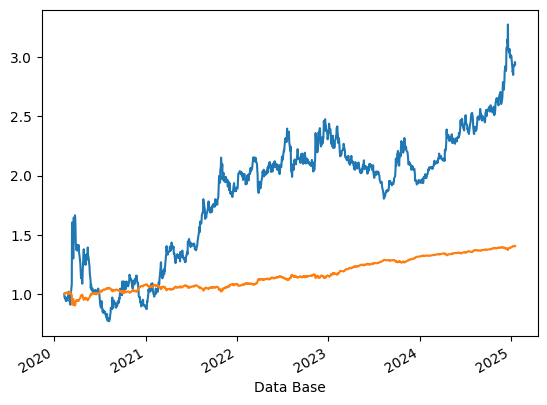

In [250]:
(ipca2026['Taxa Compra Manha'] / ipca2026['Taxa Compra Manha'].iloc[0]).plot()
(ipca2026['PU Compra Manha'] / ipca2026['PU Compra Manha'].iloc[0]).plot()

In [251]:
ipca2035 = titulos.loc[('Tesouro IPCA+', '2035-05-15')]
ipca2035

,Taxa Compra Manha,Taxa Venda Manha,PU Compra Manha,PU Venda Manha,PU Base Manha
Data Base,,,,,
2010-03-08,6.23,6.33,415.52,405.82,405.61
2010-03-09,6.25,6.35,413.78,404.12,403.91
2010-03-10,6.25,6.35,413.99,404.33,404.12
2010-03-11,6.25,6.35,414.20,404.54,404.33
2010-03-12,6.27,6.37,412.69,403.07,402.82
...,...,...,...,...,...
2025-01-13,7.54,7.66,2084.73,2060.05,2060.05
2025-01-14,7.59,7.71,2075.76,2051.20,2051.20
2025-01-15,7.50,7.62,2094.29,2069.83,2069.83


<Axes: xlabel='Data Base'>

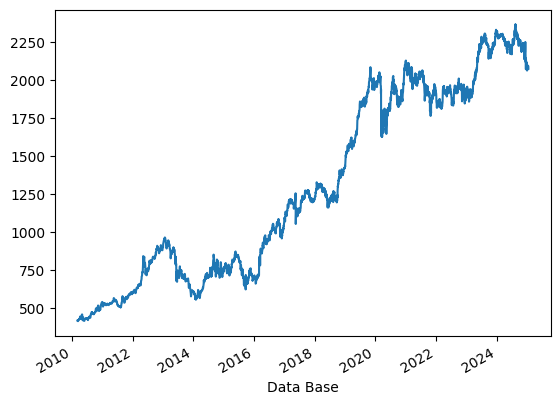

In [252]:
ipca2035['PU Compra Manha'].plot()

<Axes: xlabel='Data Base'>

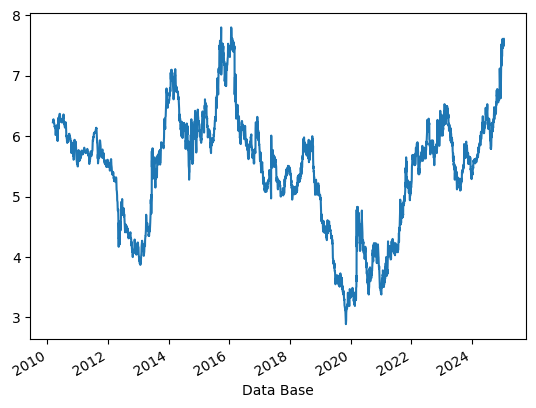

In [253]:
ipca2035['Taxa Compra Manha'].plot()

<Axes: xlabel='Data Base'>

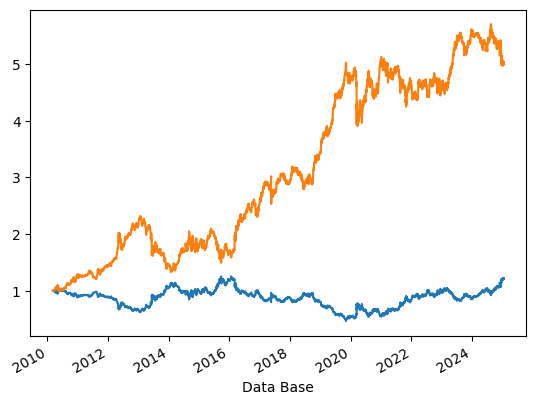

In [254]:
(ipca2035['Taxa Compra Manha'] / ipca2035['Taxa Compra Manha'].iloc[0]).plot()
(ipca2035['PU Compra Manha'] / ipca2035['PU Compra Manha'].iloc[0]).plot()

In [255]:
ipca2045 = titulos.loc[('Tesouro IPCA+', '2045-05-15')]
ipca2045

,Taxa Compra Manha,Taxa Venda Manha,PU Compra Manha,PU Venda Manha,PU Base Manha
Data Base,,,,,
2017-02-08,5.34,5.46,685.78,664.14,663.92
2017-02-09,5.27,5.39,698.96,676.90,676.67
2017-02-10,5.21,5.33,710.67,688.23,687.84
2017-02-13,5.21,5.33,710.90,688.46,688.23
2017-02-14,5.22,5.34,709.23,686.85,686.62
...,...,...,...,...,...
2025-01-13,7.32,7.44,1054.57,1030.56,1030.56
2025-01-14,7.38,7.50,1043.20,1019.45,1019.45
2025-01-15,7.26,7.38,1067.35,1043.20,1043.20


<Axes: xlabel='Data Base'>

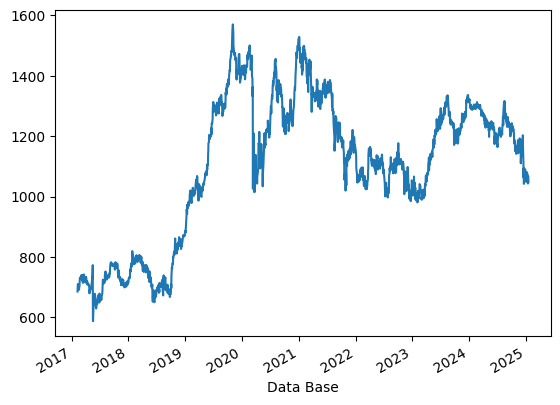

In [256]:
ipca2045['PU Compra Manha'].plot()

<Axes: xlabel='Data Base'>

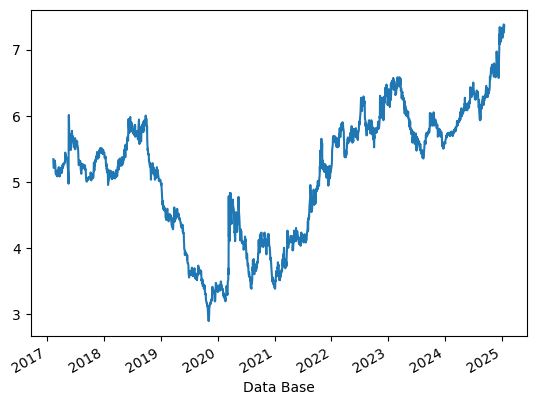

In [257]:
ipca2045['Taxa Compra Manha'].plot()

<Axes: xlabel='Data Base'>

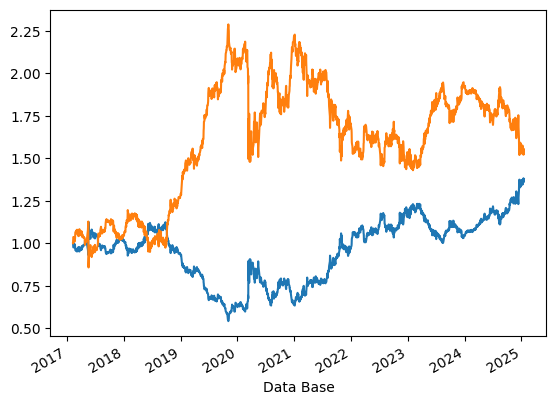

In [258]:
(ipca2045['Taxa Compra Manha'] / ipca2045['Taxa Compra Manha'].iloc[0]).plot()
(ipca2045['PU Compra Manha'] / ipca2045['PU Compra Manha'].iloc[0]).plot()

In [259]:
ipca2055 = titulos.loc[('Tesouro IPCA+ com Juros Semestrais', '2055-05-15')]
ipca2055

,Taxa Compra Manha,Taxa Venda Manha,PU Compra Manha,PU Venda Manha,PU Base Manha
Data Base,,,,,
2020-02-10,3.42,3.54,5063.37,4956.73,4955.71
2020-02-11,3.36,3.48,5119.00,5010.64,5009.63
2020-02-12,3.36,3.48,5120.02,5011.66,5010.64
2020-02-13,3.40,3.52,5084.54,4977.32,4976.30
2020-02-14,3.37,3.49,5113.38,5005.31,5003.81
...,...,...,...,...,...
2025-01-13,7.36,7.48,3752.42,3697.15,3697.15
2025-01-14,7.39,7.51,3740.58,3685.63,3685.63
2025-01-15,7.29,7.41,3787.08,3731.61,3731.61


<Axes: xlabel='Data Base'>

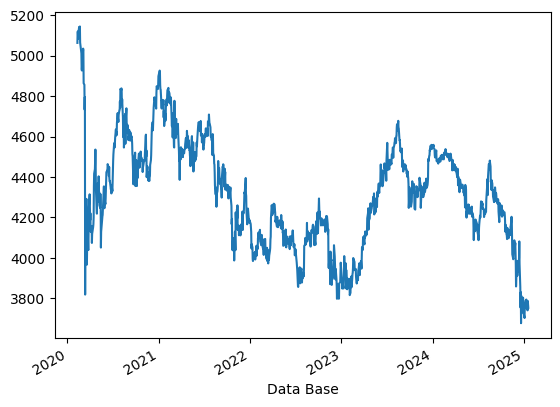

In [260]:
ipca2055['PU Compra Manha'].plot()

<Axes: xlabel='Data Base'>

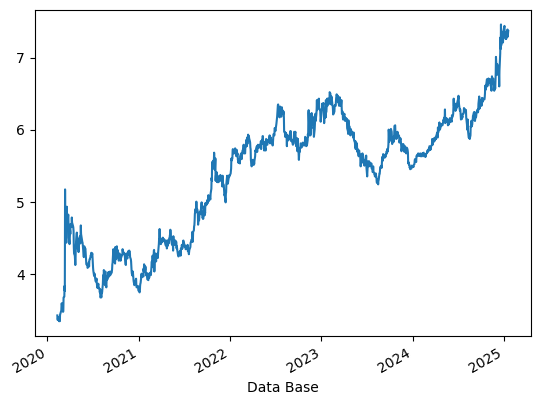

In [261]:
ipca2055['Taxa Compra Manha'].plot()

<Axes: xlabel='Data Base'>

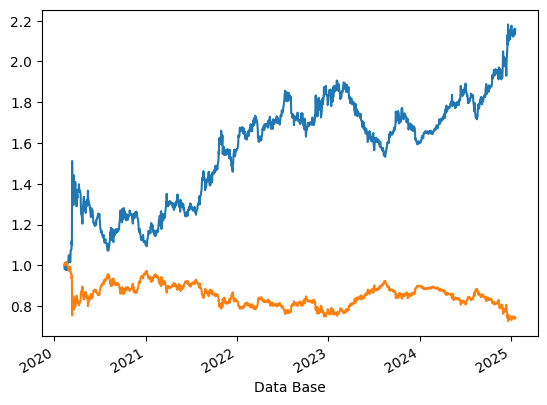

In [262]:
(ipca2055['Taxa Compra Manha'] / ipca2055['Taxa Compra Manha'].iloc[0]).plot()
(ipca2055['PU Compra Manha'] / ipca2055['PU Compra Manha'].iloc[0]).plot()

In [263]:
vendas = busca_vendas_tesouro()

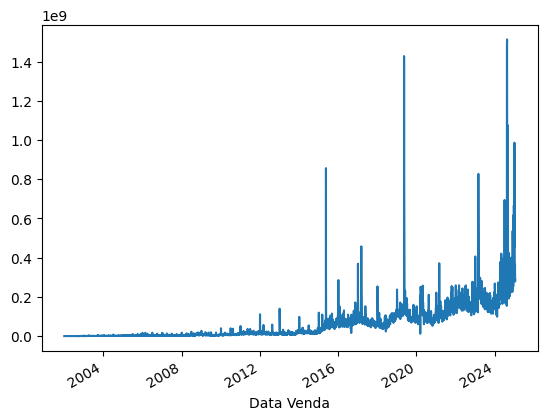

In [264]:
vendas['Valor'].groupby('Data Venda').sum().plot()

In [265]:
recompras = busca_recompras_tesouro()

<Axes: xlabel='Data Resgate'>

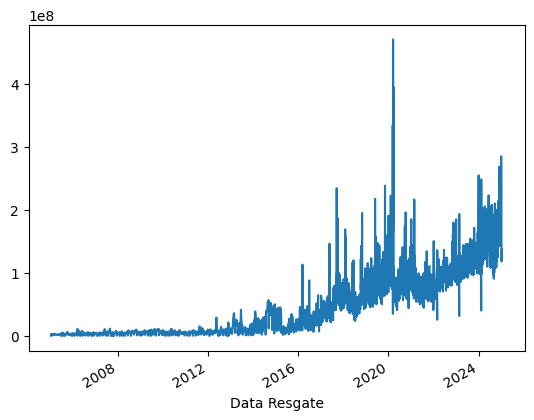

In [266]:
recompras['Valor'].groupby('Data Resgate').sum().plot()

In [267]:
recompras_selic = recompras.loc[('Tesouro Selic', '2025-03-01')]

In [ ]:
fig = px.bar(data_frame=recompras_selic,  x=recompras_selic.index, y='Valor', labels={'x':'Data'})
fig.show()

In [271]:
recompras_selic_semanal = recompras_selic.resample('W').sum()

In [ ]:
fig = px.bar(data_frame=recompras_selic_semanal,  x=recompras_selic_semanal.index, y='Valor' )
fig.show()

In [277]:
ibov = yf.download('^BVSP')['Close'].resample('W').last().pct_change()[1:]

[*********************100%***********************]  1 of 1 completed


In [278]:
selic_ibov = pd.concat([recompras_selic_semanal['Valor'].pct_change()[1:], ibov], axis=1).dropna()[1:]
selic_ibov.columns = ['Recompra(%)', 'IBOV(%)']

In [279]:
selic_ibov

,Recompra(%),IBOV(%)
2019-02-24,0.236251,0.003691
2019-03-03,0.423072,-0.033529
2019-03-10,-0.219953,0.008044
2019-03-17,1.231367,0.039553
2019-03-24,0.179772,-0.054490
2019-03-31,0.579274,0.017923
2019-04-07,-0.185600,0.017744
2019-04-14,0.124599,-0.043591
2019-04-21,0.030708,0.018336
2019-04-28,0.232518,0.017531


In [ ]:
fig = go.Figure(data=[
    go.Bar(name='Recompras Selic(%)', x=selic_ibov.index,  y=selic_ibov['Recompra(%)']),
    go.Bar(name='IBOV(%)', x=selic_ibov.index,  y=selic_ibov['IBOV(%)']),
])
fig.update_layout(barmode='group')
fig.show()

In [281]:
selic_ibov.corr()

,Recompra(%),IBOV(%)
Recompra(%),1.000000,-0.199657
IBOV(%),-0.199657,1.000000
